# Test-retest study on UW data using asymmetry index
In this script I will do a test retest study on some FSPGR and MPRAGE MRI sequencings. I follow the proccess from a matlab code, written by Ali Deatsch.

FSPGR all are cancer patients, MPRAGE are all healthy. Both are NC.

In [1]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

In [2]:
from test_retest_functions import *

In [26]:
fspgrPath = '../../UW_data/Test-retest_UWCCC_MRI_AxT1_FSPGRbravo_refined/'
mpragePath = '../../UW_data/Test-retest_NITRCKirby_MRI_T1_MPRAGE/'

maskPath = 'C:/Users/Crt/Desktop/WIMR/asymmetryAD/UW_data/AAL3+pons/'

## Dataset analysis
Firstly I will take a look at my dataset: number of subjects, number of longitudinal scans, median time between scans...

In [4]:
fspgr_patient_scans = count_patients_scan(fspgrPath, mpragePath)[0]
mprage_patient_scans = count_patients_scan(fspgrPath, mpragePath)[1]

In [5]:
print(f"Number of different patients with FSPGR scan: {len(fspgr_patient_scans)}\n")

for patient_id, scan_count in fspgr_patient_scans.items():
    print(f"Patient ID: {patient_id} - Number of scans: {scan_count}")

print('--------------------------------------------------------------')

print(f"Number of different patients with MPRAGE scan: {len(mprage_patient_scans)}\n")

for patient_id, scan_count in mprage_patient_scans.items():
    print(f"Patient ID: {patient_id} - Number of scans: {scan_count}")

Number of different patients with FSPGR scan: 16

Patient ID: GJDGYD - Number of scans: 2
Patient ID: GJDGYR - Number of scans: 2
Patient ID: GJDGYZ - Number of scans: 2
Patient ID: GJDGZH - Number of scans: 3
Patient ID: GJDGZW - Number of scans: 2
Patient ID: GJDH1X - Number of scans: 2
Patient ID: GJDH22 - Number of scans: 2
Patient ID: GJDH2A - Number of scans: 2
Patient ID: GJDH2Z - Number of scans: 2
Patient ID: GJDH4C - Number of scans: 2
Patient ID: GJDH4Q - Number of scans: 2
Patient ID: GJDHDK - Number of scans: 2
Patient ID: GJDHVO - Number of scans: 3
Patient ID: GJDHZ6 - Number of scans: 2
Patient ID: GJDHZF - Number of scans: 2
Patient ID: GJDI07 - Number of scans: 2
--------------------------------------------------------------
Number of different patients with MPRAGE scan: 21

Patient ID: S113 - Number of scans: 2
Patient ID: S127 - Number of scans: 2
Patient ID: S142 - Number of scans: 2
Patient ID: S239 - Number of scans: 2
Patient ID: S346 - Number of scans: 2
Patien

For now I'm only interested in those with 2 scan. I will filter out the dictionary to contain only those. 

In [6]:
fspgr_patient_scans = {patient_id: scans for patient_id, scans in fspgr_patient_scans.items() if scans == 2}

In [7]:
print(f"Number of different patients: {len(fspgr_patient_scans)}\n")

for patient_id, scan_count in fspgr_patient_scans.items():
    print(f"Patient ID: {patient_id} - Number of scans: {scan_count}")

Number of different patients: 14

Patient ID: GJDGYD - Number of scans: 2
Patient ID: GJDGYR - Number of scans: 2
Patient ID: GJDGYZ - Number of scans: 2
Patient ID: GJDGZW - Number of scans: 2
Patient ID: GJDH1X - Number of scans: 2
Patient ID: GJDH22 - Number of scans: 2
Patient ID: GJDH2A - Number of scans: 2
Patient ID: GJDH2Z - Number of scans: 2
Patient ID: GJDH4C - Number of scans: 2
Patient ID: GJDH4Q - Number of scans: 2
Patient ID: GJDHDK - Number of scans: 2
Patient ID: GJDHZ6 - Number of scans: 2
Patient ID: GJDHZF - Number of scans: 2
Patient ID: GJDI07 - Number of scans: 2


Now I want to calculate the median, max and min time between two scans. 

In [8]:
fspgr_scan_dates = date_of_scans(fspgrPath, fspgr_patient_scans)

In [9]:
for patient_id, dates in fspgr_scan_dates.items():
    print(f"Patient {patient_id} has scan dates: {dates}")

Patient GJDGYD has scan dates: ['2012-06-17', '2012-06-29']
Patient GJDGYR has scan dates: ['2019-05-11', '2019-05-15']
Patient GJDGYZ has scan dates: ['2014-11-13', '2014-11-29']
Patient GJDGZW has scan dates: ['2013-03-20', '2013-03-26']
Patient GJDH1X has scan dates: ['2017-05-14', '2017-05-23']
Patient GJDH22 has scan dates: ['2011-02-21', '2011-02-26']
Patient GJDH2A has scan dates: ['2015-09-28', '2015-10-03']
Patient GJDH2Z has scan dates: ['2019-05-14', '2019-05-22']
Patient GJDH4C has scan dates: ['2016-07-10', '2016-07-17']
Patient GJDH4Q has scan dates: ['2015-02-28', '2015-03-09']
Patient GJDHDK has scan dates: ['2016-09-15', '2016-10-03']
Patient GJDHZ6 has scan dates: ['2019-08-19', '2019-09-16']
Patient GJDHZF has scan dates: ['2019-06-11', '2019-07-01']
Patient GJDI07 has scan dates: ['2019-11-09', '2019-11-16']


Finally calculating the time differences.

In [10]:
fspgr_time_between_scans = []

for dates_array in fspgr_scan_dates.values():

    date0 = parser.parse(dates_array[0])
    date1 = parser.parse(dates_array[1])

    diff = date1 - date0

    fspgr_time_between_scans.append(diff.days)

In [11]:
print(fspgr_time_between_scans)

[12, 4, 16, 6, 9, 5, 5, 8, 7, 9, 18, 28, 20, 7]


In [12]:
fspgr_average = np.mean(fspgr_time_between_scans)
fspgr_medi = int(np.median(fspgr_time_between_scans))
fspgr_minimum = np.min(fspgr_time_between_scans)
fspgr_maximum = np.max(fspgr_time_between_scans)

In [13]:
print(f'''Average time between two scans: {fspgr_average} days
Median time between two scans: {fspgr_medi} days
Range: {fspgr_minimum}-{fspgr_maximum} days''')

Average time between two scans: 11.0 days
Median time between two scans: 8 days
Range: 4-28 days


!! MPRAGE scans were all taken on the same day. !!

## Asymmetry index

Getting the file paths of those patients with 2 scans. 

In [14]:
fspgr_files = filepaths(fspgrPath, mpragePath, fspgr_patient_scans)[0]
mprage_files = filepaths(fspgrPath, mpragePath, mprage_patient_scans)[1]

Separating first scans from second scans.

In [16]:
fspgr_first_scans = separate_scans(fspgr_files)[0]
fspgr_second_scans = separate_scans(fspgr_files)[1]

mprage_first_scans = separate_scans(mprage_files)[0]
mprage_second_scans = separate_scans(mprage_files)[1]

Visualizing data.

In [19]:
fspgr_example = fspgr_files[0]
mprage_example = mprage_files[0]

fspgr_example_image = nib.load(fspgr_example)
mprage_example_image = nib.load(mprage_example)

fspgr_example_img_data = fspgr_example_image.get_fdata()
mprage_example_img_data = mprage_example_image.get_fdata()

print(fspgr_example_img_data.shape)
print(mprage_example_img_data.shape)

(91, 109, 91)
(91, 109, 91)


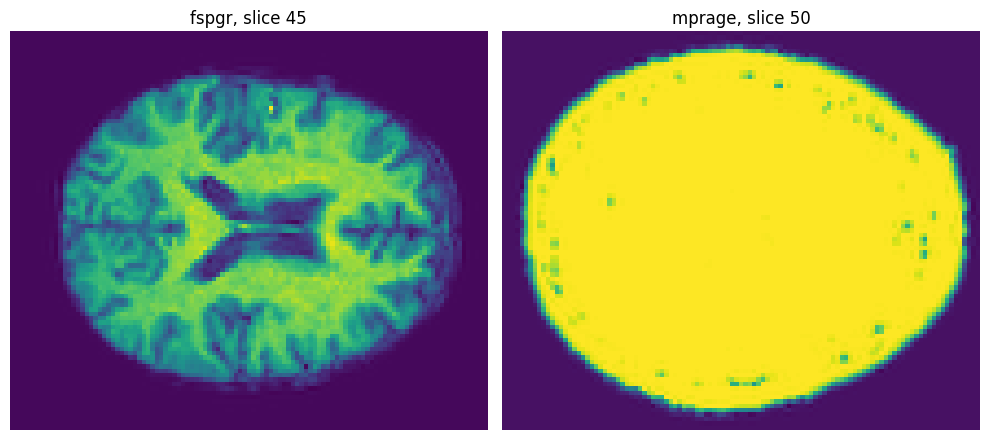

In [25]:
# Visualize slices of FSPGR and MPRAGE images side by side
fspgr_slice_index = fspgr_example_img_data.shape[2] // 2  # Middle slice for fspgr
mprage_slice_index = mprage_example_img_data.shape[2] // 2        # Middle slice for mprage

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(fspgr_example_img_data[:, :, fspgr_slice_index])
axs[0].set_title(f'fspgr, slice {fspgr_slice_index}')
axs[0].axis('off')

axs[1].imshow(mprage_example_img_data[:, :, mprage_slice_index])
axs[1].set_title(f'mprage, slice {mprage_slice_index}')
axs[1].axis('off')

plt.tight_layout()
plt.show()

Loading the mask. 

In [ ]:
mask_title = []

with open(maskPath + '')